<a href="https://colab.research.google.com/github/akhilesh-kanmanthreddy/brain_tumor_diagnosing_system/blob/main/Brain_Tumor_Segmentation_Flint_Regonial_Science_and_Engineering_Fair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# installing 

In [ ]:
# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
!pip install --upgrade tensorflow==2.5.0

In [ ]:
!wget https://psfiles.link/project/mask_rcnn_colab/mrcnn_demo_PIBVGJTEFX.zip
!unzip mrcnn_demo_PIBVGJTEFX.zip
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")
from m_rcnn import *
%matplotlib inline

In [ ]:
!nvidia-smi

# preparing images 

In [ ]:
# Extract Images
images_path = "dataset.zip"
annotations_path = "annotations.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 100 images


In [ ]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

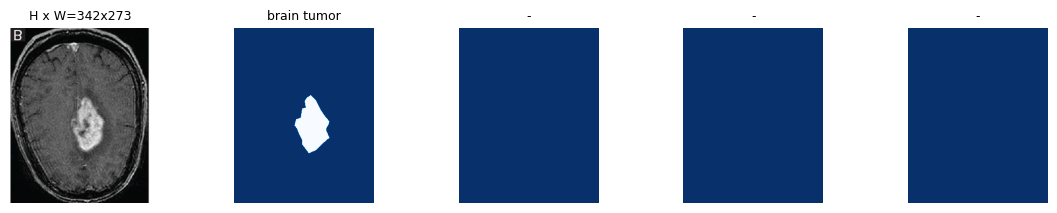

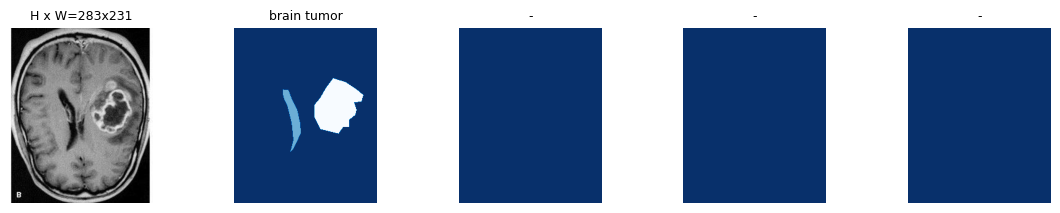

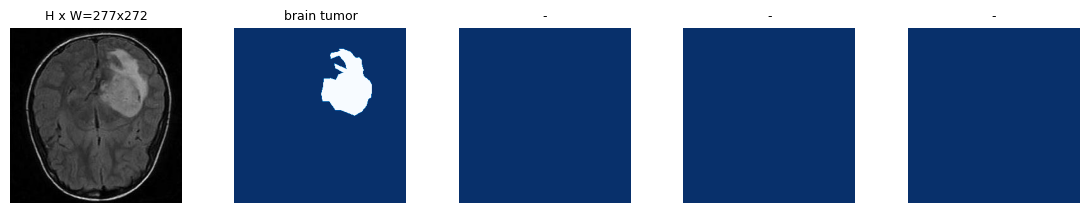

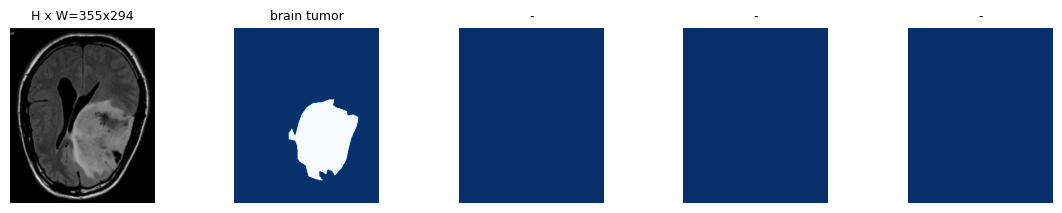

In [ ]:
# Load image samples
display_image_samples(dataset_train)

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
# config.display()
model = load_training_model(config)

# training 

In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)

# testing

In [ ]:
#test on random image 
test_model, inference_config = load_test_model(class_number)
test_random_image(test_model, dataset_val, inference_config)

In [ ]:
# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
!pip install --upgrade tensorflow==2.5.0
import cv2

In [ ]:
!wget https://psfiles.link/project/mask_rcnn_colab/mrcnn_demo_PIBVGJTEFX.zip
!unzip mrcnn_demo_PIBVGJTEFX.zip
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")
from m_rcnn import *
from visualize import random_colors, get_mask_contours, draw_mask
%matplotlib inline

In [ ]:
!nvidia-smi

In [ ]:
# Load Image
img = cv2.imread("/content/drive/MyDrive/data /yes/y1085.jpg")

In [ ]:
test_model, inference_config = load_inference_model(1, "/content/mask_rcnn_object_0005.h5")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)

Loading weights from  /content/mask_rcnn_object_0005.h5


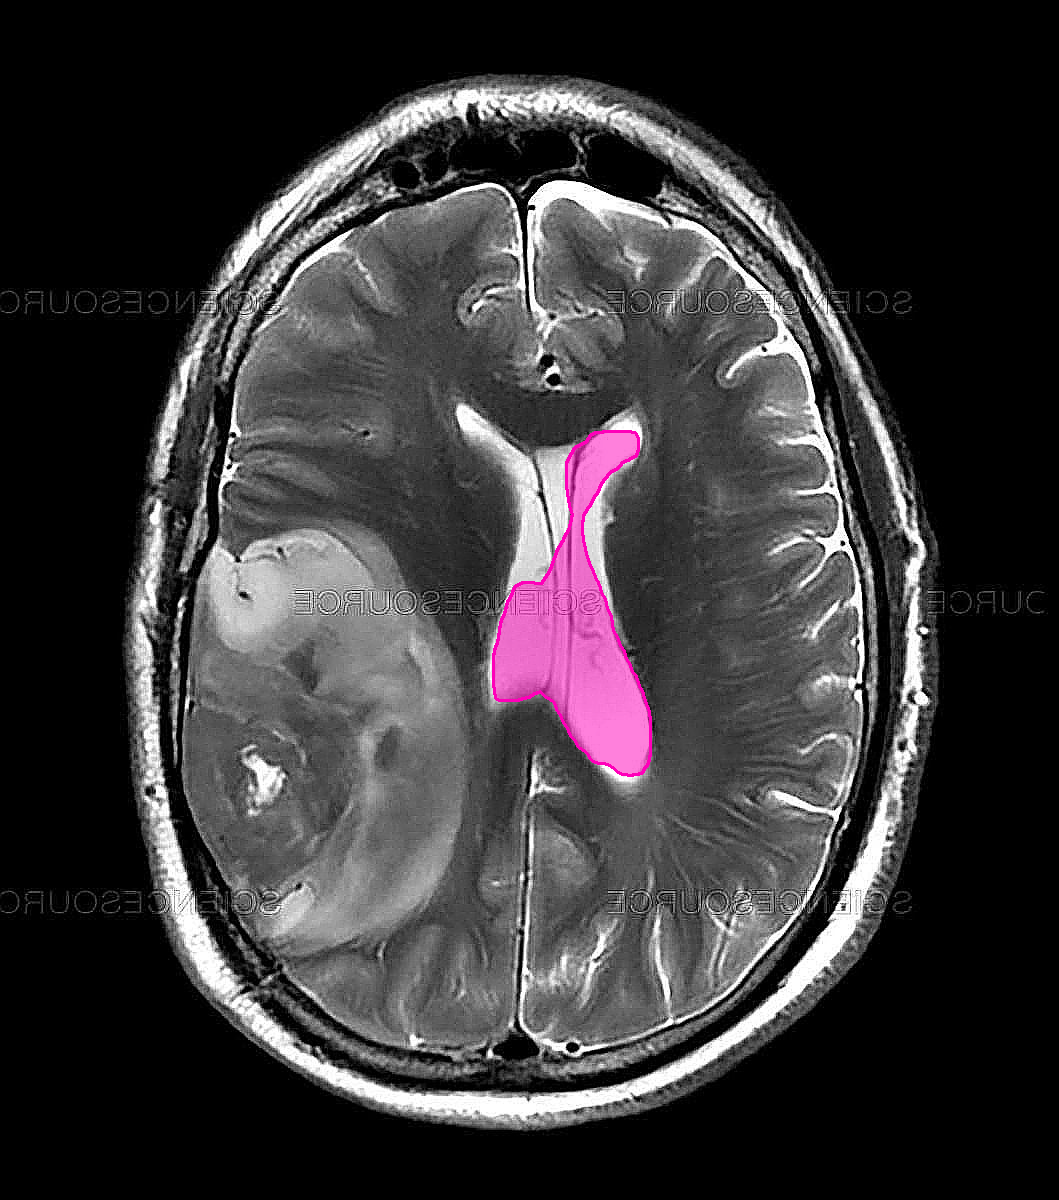

In [ ]:
from google.colab.patches import cv2_imshow
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])

cv2_imshow(img)

# Dimension code


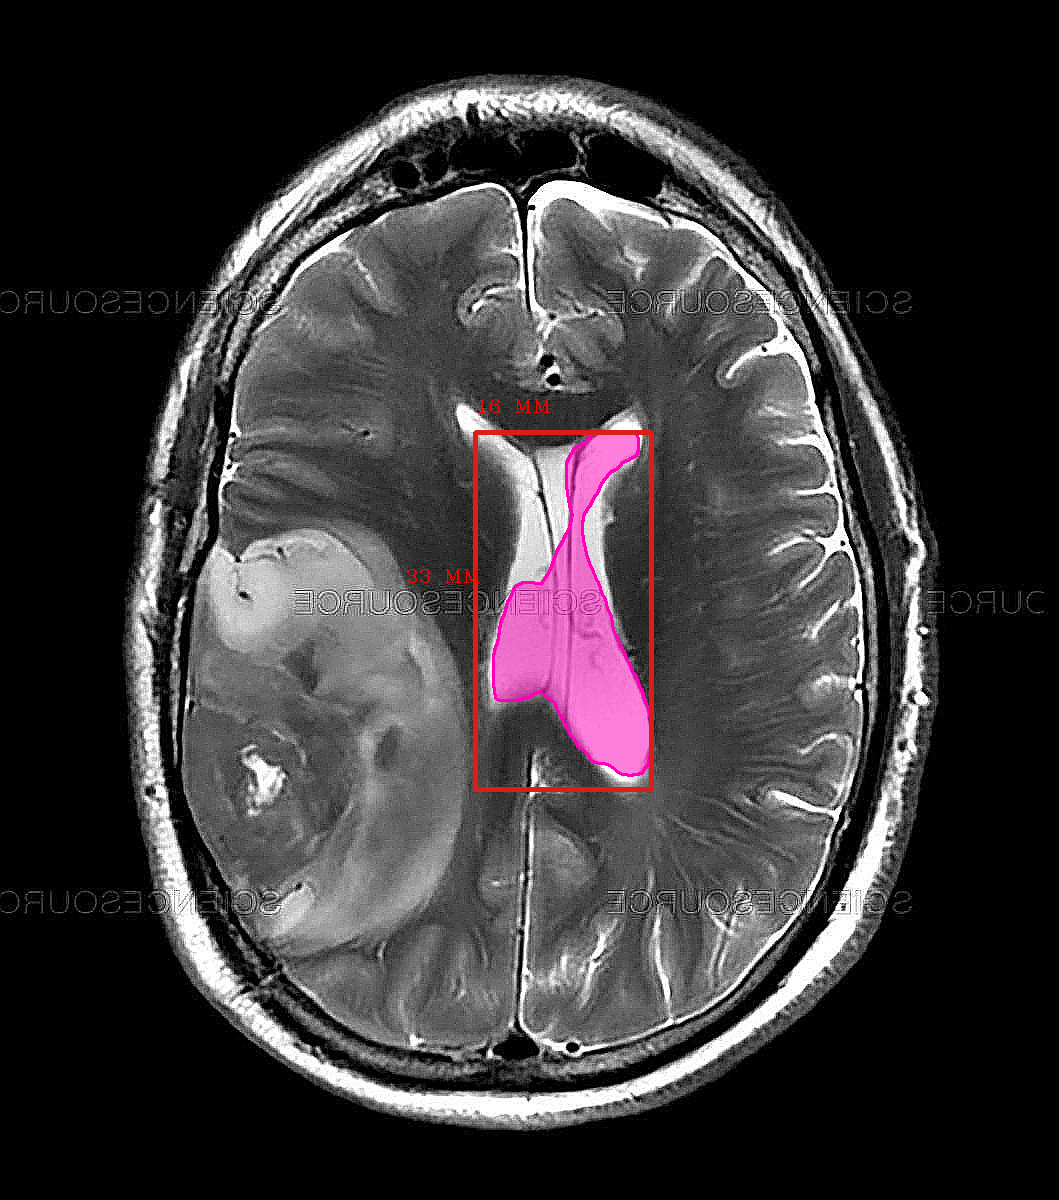

the length of the brain tumor in milimeters was estimated to be: 
32.666666666666664
the width of the brain tumor in milimeters was estimated to be: 
16.104575163398692


In [ ]:
from google.colab.patches import cv2_imshow
for i in range(object_count):
  y1, x1, y2, x2 = r["rois"][i]
  
  cv2.rectangle(img,(x1, y1), (x2, y2), (25, 30, 220), 4)

  width = x2 - x1 
  length = y2 - y1

  #cv2.putText(img, str(width), (x1, y1 - 10), cv2.FONT_HERSHEY_PLAIN, 1, (25, 15, 220), 2)

  #14mm is 153 pixels 

  ratio = 153 / 14
  mm_width = round(width/ratio)
  mm_length = round(length/ratio)
  mm_squared_area = mm_length * mm_width
  mm1_width = (width/ratio)
  mm1_length = (length/ratio)
  mm1_squared_area = mm1_length * mm1_width

  #cv2.putText(img, "{} MM".format(mm_width), (x1, y1 - 20), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 1)
  #cv2.putText(img, "{} MM".format(mm_length), (x1 - 70, y1 + 150), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 1)
  #cv2.putText(img, "{} MM".format(mm_squared_area), (x1 - 100, y1 + 180), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 1)
  cv2_imshow(img)
  
  print("the length of the brain tumor in milimeters was estimated to be: ")
  print(mm1_length)
  print("the width of the brain tumor in milimeters was estimated to be: ")
  print(mm1_width)
  print("the  area of the brain tumor in milimeters squared was estimated to be: ")
  print(mm1_squared_area)
